**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Aprendizaje Supervisado Parte 2

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import io
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score # Métrica de exactitud genérica
from sklearn.metrics import balanced_accuracy_score # Exactitud balanceada
from sklearn.naive_bayes import GaussianNB # Bayes ingenuo Gaussiano
from sklearn.metrics import precision_score # Métrica de precisión
from sklearn.metrics import recall_score # Métrica de memoría o recall
from sklearn.metrics import fbeta_score # Métrica F beta
from sklearn.metrics import confusion_matrix # Matriz de confusión
from sklearn.metrics import roc_curve # Curva ROC
from sklearn.metrics import auc # Métrica del área bajo la curva
from sklearn.metrics import RocCurveDisplay # Receiver operating characteristic (ROC) curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay # Curva que relaciona precisión y Recall
# Introducimos otra métrica usando validación cruzada
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report # Para generar un reporte general de la clasificación
from sklearn.calibration import CalibrationDisplay # Cruva de calibración

## Métodos de Validación de Modelos de Clasificación Biclase

In [2]:
url_1 = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/X_Norm_Train.xlsx"
url_2 = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/X_Norm_Test.xlsx"
url_3 = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Y_Train.xlsx"
url_4 = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Y_Test.xlsx"

download_1 = requests.get(url_1).content
download_2 = requests.get(url_2).content
download_3 = requests.get(url_3).content
download_4 = requests.get(url_4).content

X_Norm_Train = pd.read_excel(url_1)
X_Norm_Test = pd.read_excel(url_2)
Y_Train = pd.read_excel(url_3)
Y_Test = pd.read_excel(url_4)

In [3]:
X_Norm_Train = X_Norm_Train[['Aa',	' Ao',	' Dcl',' Iy',	' Sh']]
X_Norm_Test = X_Norm_Test[['Aa',	' Ao',	' Dcl',' Iy',	' Sh']]
Y_Train = Y_Train[' Class']
Y_Test = Y_Test[' Class']

## Creando un modelo de clasificación binaria

In [4]:
GNB = GaussianNB()
GNB.fit(X_Norm_Train,Y_Train)

GaussianNB()

In [5]:
Y_Predicho = GNB.predict(X_Norm_Test)

### Exactitud Genérica y Balanceada

La exactitud genérica es una métrica que relaciona el número de muestras mal clasificados, $NA$, con respecto al número total de muestras, $N$. Esta métrica esta expresado como:

$$ExactitudGenerica = 1 - \frac{NA}{N}$$

Si la exactitud genérica es igual 1, significa que el modelo generalizó el aprendizaje de los datos.

In [6]:
Puntaje_1 = accuracy_score(Y_Test, Y_Predicho)
print("Exactitud Genérica es = {:.4f} %".format(100*Puntaje_1))

Exactitud Genérica es = 74.7226 %


Si hay un desbalance de clases, se puede realizar el siguiente cálculo:

In [7]:
Puntaje_1_1 = balanced_accuracy_score(Y_Test, Y_Predicho)
print("Exactitud Balanceada es = {:.4f} %".format(100*Puntaje_1_1))

Exactitud Balanceada es = 73.5362 %


### Precisión

Es una métrica que determina la habilidad del modelo para capturar las características que pertenencen positivamente a una muestra y como evita la mala clasificación de las características.

$$Precision = \frac{TP}{TP + FP}$$

donde $TP$ el el número de muestras que son verdaderos positivos y $FP$ es el número de falsos positivos. Si la precisión es igual a 1, significa que el modelo generalizó el aprendizaje de los datos.

In [8]:
Puntaje_2 = precision_score(Y_Test, Y_Predicho, average = 'binary')
print("La Precisión es = {:.4f} %".format(100*Puntaje_2))

La Precisión es = 54.3189 %


**Notas**:  
- average = 'micro', 'macro' para tres o más clases

### Recall o Memoría

Es una métrica que detecta el número de muestras que son verdaderos positivos entre todos los positivos potenciales que pueden ser valorados.

$$Recall = \frac{TP}{TP + FN}$$

donde $FN$ es el número de muestras que son falsos negativos. Si Recall es 1, el modelo generalizó el aprendizaje de los datos.

In [9]:
Puntaje_3 = recall_score(Y_Test, Y_Predicho, average='binary')
print("Recall es = {:.4f} %".format(100*Puntaje_3))

Recall es = 70.7792 %


### Métrica $F_{\beta}$ 

Es una métrica que evalua un promedio ponderado armónico entre la precisión y recall, dado por un parámetro $\beta$:

$$F_{\beta} = (\beta^2 + 1) \frac{Precision - Recall}{(\beta^2 *Precision) + Recall}$$

Si $\beta = 1$, se obtiene un perfecto balance entre precisión y recall, el cual llamaremos **medida F1**:

$$F_{1} = 2 \left ( \frac{Precision - Recall}{Precision + Recall} \right )$$

Si $\beta < 1$, la métrica le dará más peso a la precisión que recall. En caso contrario, la métrica le dará más peso a recall si $\beta > 1$.

Si la medida F1 es igual 1 entonces el modelo generalizó el aprendizaje de los datos.

In [10]:
Puntaje_4 = fbeta_score(Y_Test, Y_Predicho, average='binary', beta = 1)
Puntaje_4_1 = fbeta_score(Y_Test, Y_Predicho, average='binary', beta = 0.75)
Puntaje_4_2 = fbeta_score(Y_Test, Y_Predicho, average='binary', beta = 1.25)
print("F1 = {:.4f} %".format(100*Puntaje_4))
print("F_Beta(0.75) = {:.4f} %".format(100*Puntaje_4_1))
print("F_Beta(1.25) = {:.4f} %".format(100*Puntaje_4_2))

F1 = 61.4662 %
F_Beta(0.75) = 59.2821 %
F_Beta(1.25) = 63.2943 %


**Notas**:  
- Profe recomienda betas de 0.75 y 1.25
- Entre más beta, mejor desempeño en la momorización
- Con menos beta, le da más peso a la precisión
- Para que sea eficiente, debe ser mayor a 90%

### Reporte General de la Clasificación

In [11]:
print(classification_report(Y_Test, Y_Predicho, target_names=["Clase 0", "Clase 1"], digits = 4))
# Muestra la precisión, recall, medida F1 y medida de soporte (opcional), por cada clase o etiqueta. 

              precision    recall  f1-score   support

     Clase 0     0.8676    0.7629    0.8119      1160
     Clase 1     0.5432    0.7078    0.6147       462

    accuracy                         0.7472      1622
   macro avg     0.7054    0.7354    0.7133      1622
weighted avg     0.7752    0.7472    0.7557      1622



### Matriz de Confusión

Es una matriz que permite diferenciar entre diferentes clases de muestras mal clasificadas y bien clasificadas. La matriz considera cuatro definiciones (se usa notaciones binarias):

1) **Verdadero Positivo (TP)**: Es una muestra positiva (1 positivo) correctamente clasificada.

2) **Falso Positivo (FP)**: Es una muestra negativa (0 negativo) clasificada como positiva.

3) **Verdadero Negativo (TN)**: Es una muestra negativa correctamente clasificada.

4) **Falso Negativo (FN)**: Es una muestra positiva clasificada como negativo.

Por lo general, **Falso Positivo** y **Falso Negativo** son errores de clasificación. En cambio, **Verdadero Positivo** y **Verdadero Negativo** son aciertos de la clasificación.

La matriz de confusión esta organizado como:

$$M = \begin{bmatrix} TP & FN\\ FP & TN \end{bmatrix}$$

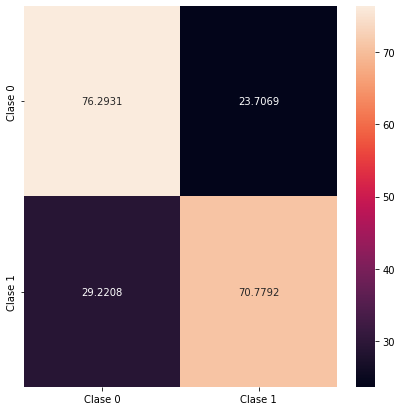

In [12]:
Matriz = confusion_matrix(y_true = Y_Test, y_pred = Y_Predicho, normalize = 'true')
Clases = ['Clase 0', 'Clase 1']

plt.figure(figsize=(7,7))
ax = sns.heatmap(100*Matriz, annot = True, fmt = 'g', xticklabels = Clases, yticklabels = Clases)
plt.show()

### Validación Cruzada

Es un método estadístico que evalua el desempeño generalizado que es más estable y eficiente para validar la exactitud de un modelo. Por lo general, la validación cruzada usa un parámetro llamado **folds o doblajes** donde se especifica un valor de 3, 5, 10 o 20 que es el número de validación cruzadas que realiza con subconjuntos de datos que el método selecciona. Por ejemplo, si los doblajes o folds es igual 5, entonces se particiona los datos en 5 subconjuntos de datos. 

En este escenario de aplicación, se utiliza el puntaje por validación cruzada, donde un valor de 1 indica un modelo perfecto.

In [13]:
Puntaje_5 = cross_val_score(GNB, X_Norm_Test, Y_Test, scoring = 'accuracy', cv = 15, error_score = 1e-4)
Media = np.mean(Puntaje_5)
Desviacion_Estandar = np.std(Puntaje_5)
Puntaje_5 = pd.DataFrame(Puntaje_5.T, columns = ['Exactitud (%)'])
print("Exactitud media = {:.4f} %".format(100*Media))
print("Desviación Estándar de la Exactitud = {:.4f} %".format(100*Desviacion_Estandar))
display(100*Puntaje_5)

Exactitud media = 76.5104 %
Desviación Estándar de la Exactitud = 3.8662 %


,Exactitud (%)
0,77.981651
1,75.229358
2,75.000000
3,77.777778
4,82.407407
5,75.925926
6,81.481481
7,74.074074
8,71.296296
9,75.000000


### Curva ROC

La curva ROC o **características de funcionamiento del receptor** es una herramienta de evaluación que compara diferentes clasificadores que pueden asignar un puntaje a sus predicciones. Por lo general, el puntaje puede ser interpretado como una **probabilidad** entre 0 y 1. Una gráfica típica de la curva ROC es la siguiente:

<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/ROC.jpg" width="1500"/>
</div>

El eje x representa el incremento de la tasa de falsos positivos, el cual establece la **especificidad** del aprendizaje de los datos. El eje y representa el incremento de la tasa de verdaderos positivos, el cual establece la **sensibilidad** del aprendizaje de los datos. La línea punteada representa un **clasificador aleatorio perfecto**, que sirve como referencia y es elegido aleatoriamente (en nuestro caso, va a ser nuestro umbral).

El valor del área bajo la curva es 73.5362 %


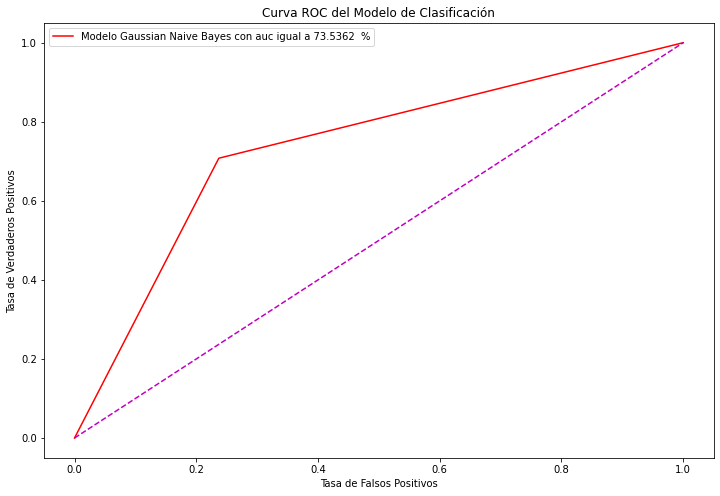

In [14]:
FPr, TPr, umbrales = roc_curve(Y_Test, Y_Predicho)
Puntaje_6 = auc(FPr, TPr)
print("El valor del área bajo la curva es {:.4f} %".format(100*Puntaje_6))

fig = plt.figure(figsize=(12,8))
plt.plot(FPr, TPr, color = 'r', label = ('Modelo Gaussian Naive Bayes con auc igual a {:.4f}  %'.format(100*Puntaje_6)))
plt.plot([0, 1], [0, 1], color = 'm', linestyle = '--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Modelo de Clasificación')
plt.legend(loc = 'best')
plt.show()

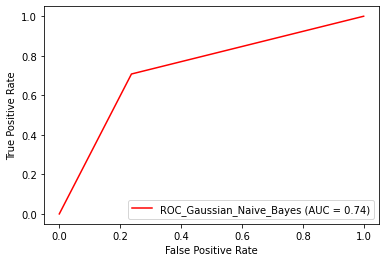

In [15]:
visualizacion = RocCurveDisplay(fpr = FPr, tpr = TPr, 
                                roc_auc = Puntaje_6, estimator_name = 'ROC_Gaussian_Naive_Bayes')
visualizacion.plot(color = "r")
plt.show()

### Curva de Precisión vs Recall

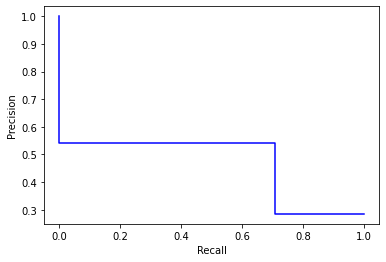

In [16]:
precision, recall, _ = precision_recall_curve(Y_Test, Y_Predicho)
Precision_Recall = PrecisionRecallDisplay(precision, recall)
Precision_Recall.plot(color = "b")
plt.show()

Para que la curva sea perfecta, la curva se debe acerca al extremo superior derecha, cuando la precisión y recall es igual a 1.

### Curva de la Calibración

Es una curva que usa las entradas desde un modelo de clasificación biclase y el promedio de las probabilidades predichas por cada clase, comparandolo con fracciones de datos bien etiquetados o verdaderos positivos (Fracciones de positivos).

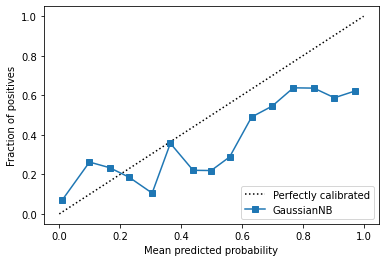

In [17]:
calibrar = CalibrationDisplay.from_estimator(GNB, X_Norm_Test, Y_Test, n_bins = 15, strategy = 'uniform')
plt.show()

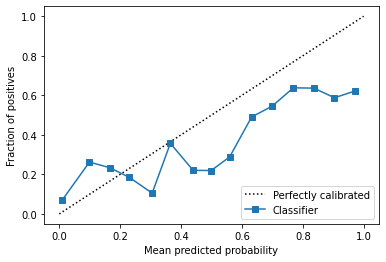

In [18]:
Y_prob = GNB.predict_proba(X_Norm_Test)[:, 1]
Calibracion = CalibrationDisplay.from_predictions(Y_Test, Y_prob, n_bins = 15, strategy = 'uniform')
plt.show()